In [39]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from IPython.display import Audio
%matplotlib inline
# %matplotlib

Text(0.5, 1.0, 'Rectangular Window Zero Padded to 1024 Samples')

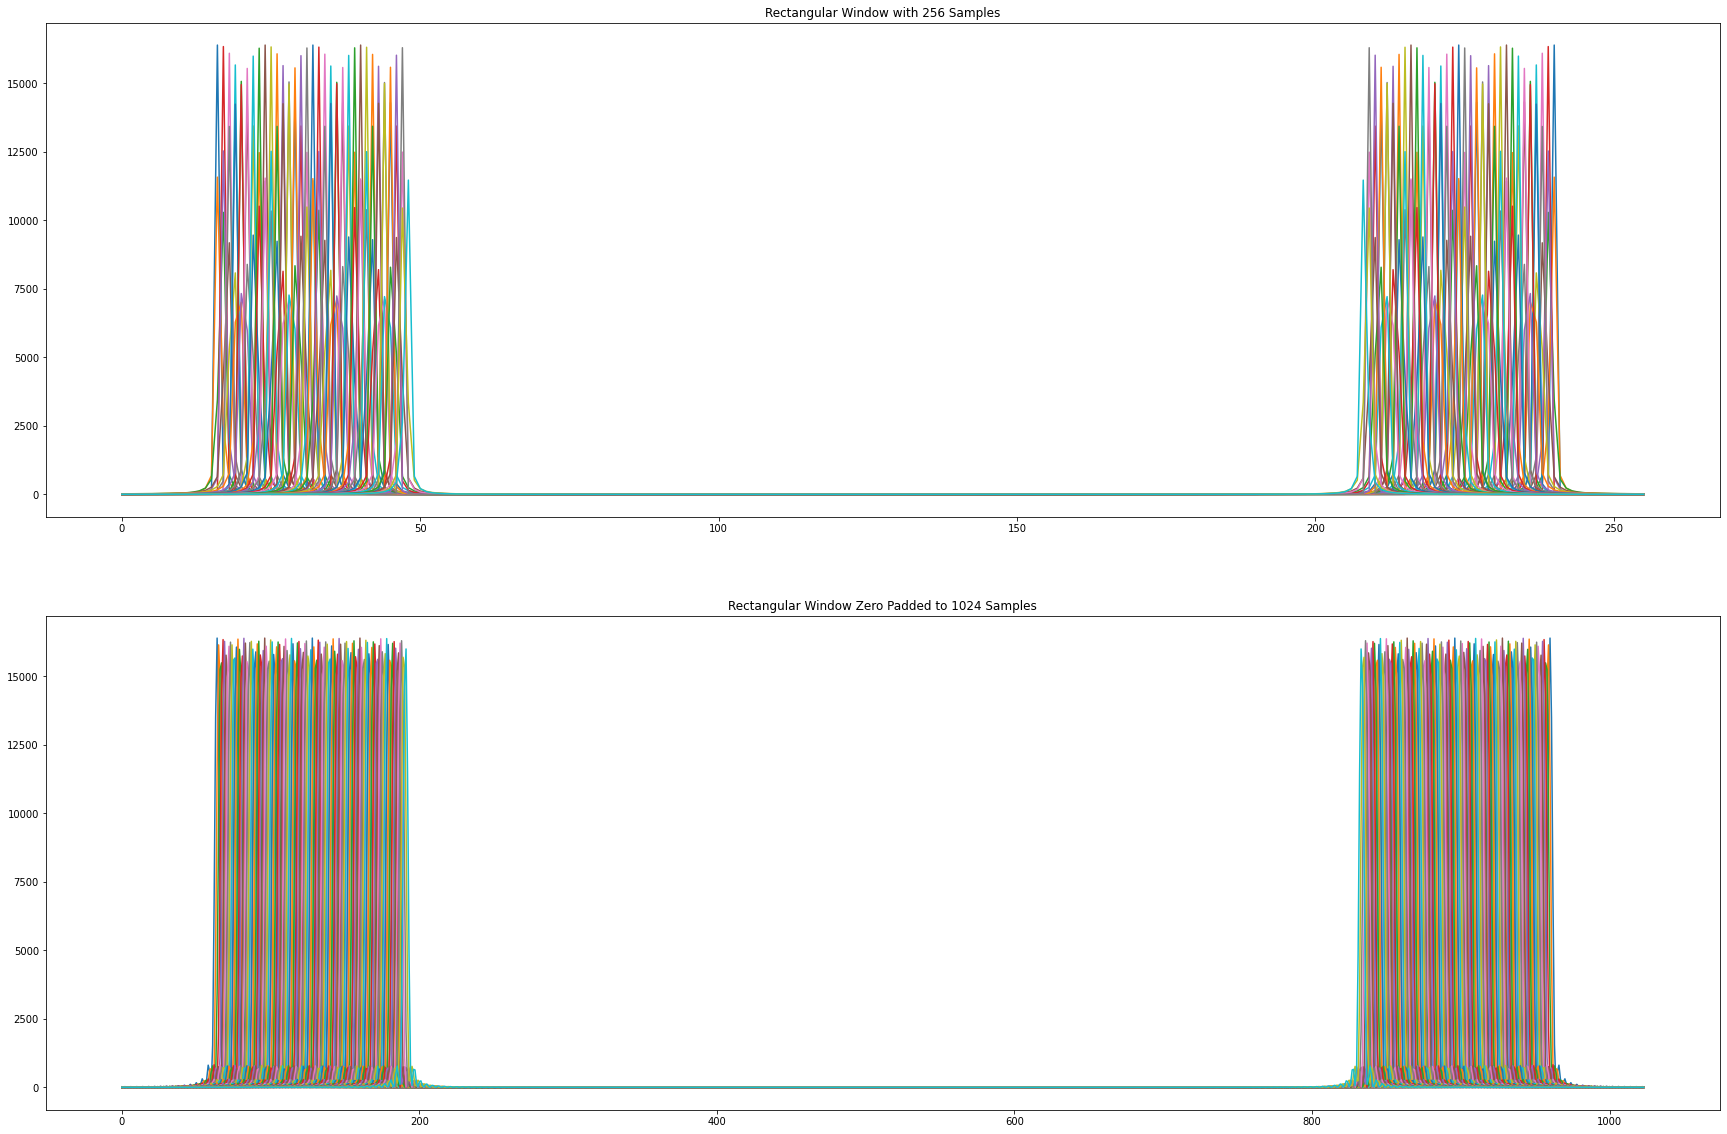

In [40]:
# rectangular window with and without zero-padding
N = 256;                 # length of test signals
num_freqs = 100;         # number of frequencies to test

# Generate vector of frequencies to test
omega = np.pi/8 + np.linspace(0,num_freqs-1,num_freqs)/num_freqs*np.pi/4;


S = np.zeros([N,num_freqs]);                        # matrix to hold FFT results
S_padded = np.zeros([N*4, num_freqs])               # matrix to hold zero padded FFT results

for i in range(0,len(omega)):                       # loop through freq. vector
    s = np.sin(omega[i]*np.linspace(0,N-1,N));      # generate test sine wave
    s_padded = np.append(s, np.zeros(N*3))          # zero pad data
    win = signal.boxcar(N);                         # use rectangular window
    win_padded = signal.boxcar(N*4)
    s = s*win;                                      # multiply input by window
    s_padded = s_padded * win_padded
    S[:,i] = np.square(np.abs(np.fft.fft(s)));      # generate magnitude of FFT
    S_padded[:,i] = np.square(np.abs(np.fft.fft(s_padded)))
                                                    # and store as a column of S
plt.figure(figsize=(30,20))
plt.subplot(211)
plt.plot(S)                                         # plot all spectra on same graph
plt.title("Rectangular Window with 256 Samples")
plt.subplot(212)
plt.plot(S_padded)
plt.title("Rectangular Window Zero Padded to 1024 Samples")

Text(0.5, 1.0, 'Rectangular Window Zero Padded to 1024 Samples')

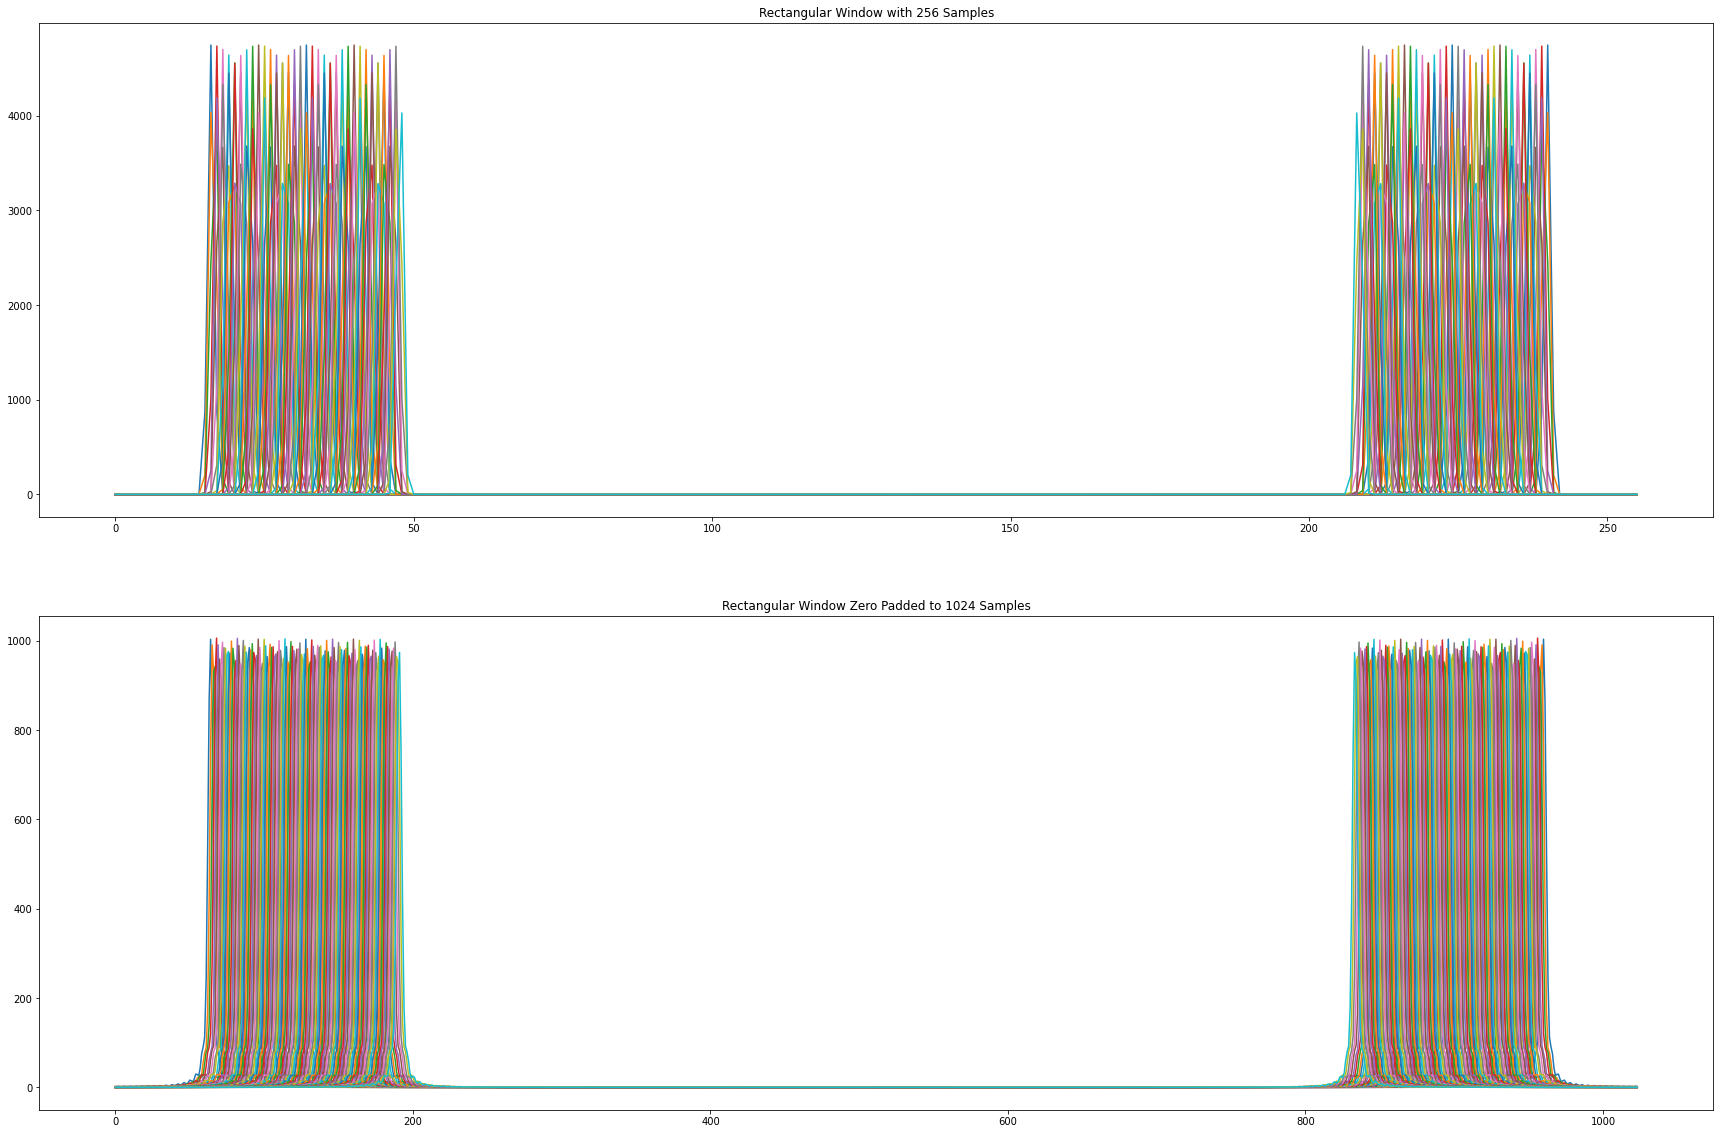

In [41]:
# Hamming window with and without zero-padding
N = 256;                 # length of test signals
num_freqs = 100;         # number of frequencies to test

# Generate vector of frequencies to test
omega = np.pi/8 + np.linspace(0,num_freqs-1,num_freqs)/num_freqs*np.pi/4;


S = np.zeros([N,num_freqs]);                        # matrix to hold FFT results
S_padded = np.zeros([N*4, num_freqs])               # matrix to hold zero padded FFT results

for i in range(0,len(omega)):                       # loop through freq. vector
    s = np.sin(omega[i]*np.linspace(0,N-1,N));      # generate test sine wave
    s_padded = np.append(s, np.zeros(N*3))          # zero pad data
    win = signal.hamming(N);                         # use rectangular window
    win_padded = signal.hamming(N*4)
    s = s*win;                                      # multiply input by window
    s_padded = s_padded * win_padded
    S[:,i] = np.square(np.abs(np.fft.fft(s)));      # generate magnitude of FFT
    S_padded[:,i] = np.square(np.abs(np.fft.fft(s_padded)))
                                                    # and store as a column of S
plt.figure(figsize=(30,20))
plt.subplot(211)
plt.plot(S)                                         # plot all spectra on same graph
plt.title("Rectangular Window with 256 Samples")
plt.subplot(212)
plt.plot(S_padded)
plt.title("Rectangular Window Zero Padded to 1024 Samples")

#### Describe the tradeoff between mainlobe width and sidelobe behavior for the various window functions. Does zero-padding increase frequency resolution? Are we getting something for free? What is the relationship between the DFT, X[k], and the DTFT, X(ω), of a sequence x[n]?

Not sure. Also, hamming window prevents less spectral leakage. 


Zero-padding increases frequency resolution. Zooming in the graphs above, many of the signals overlap without padding making it difficult to differentiate different signals in the frequency domain. It becomes much easier once they are zero padded. 

This is not free because we need to store zeros, and bigger window, and perform more computations. 

For the DTFT, X($\omega$) represents a summation whose bounds are from negative infinity to infinity. This is due to having discretized samples but continuous frequencies. For the DFT, X[k] repesents a summations from 0 to N - 1 where N is the number of samples. This is more practical since the samples and frequency are both discretized. Both X($\omega$) and X[k] are within the frequency domain whereas x[n] is in the time domain. 

In [42]:
# creating signal for part 2

fs = 8000        # Sampling Rate is 8000
duration = 1     # 1 sec
t = np.linspace(0,duration,duration*fs)
f_1 = 2000       # Tune Frequency is 600Hz
f_2 = 2200
tune = np.sin(2*np.pi*f_1*t)
tune += np.sin(2*np.pi*f_2*t)

# To listen to it, you can use:
Audio(tune,rate=fs)

8000


Text(0.5, 1.0, 'Hamming Window Padded')

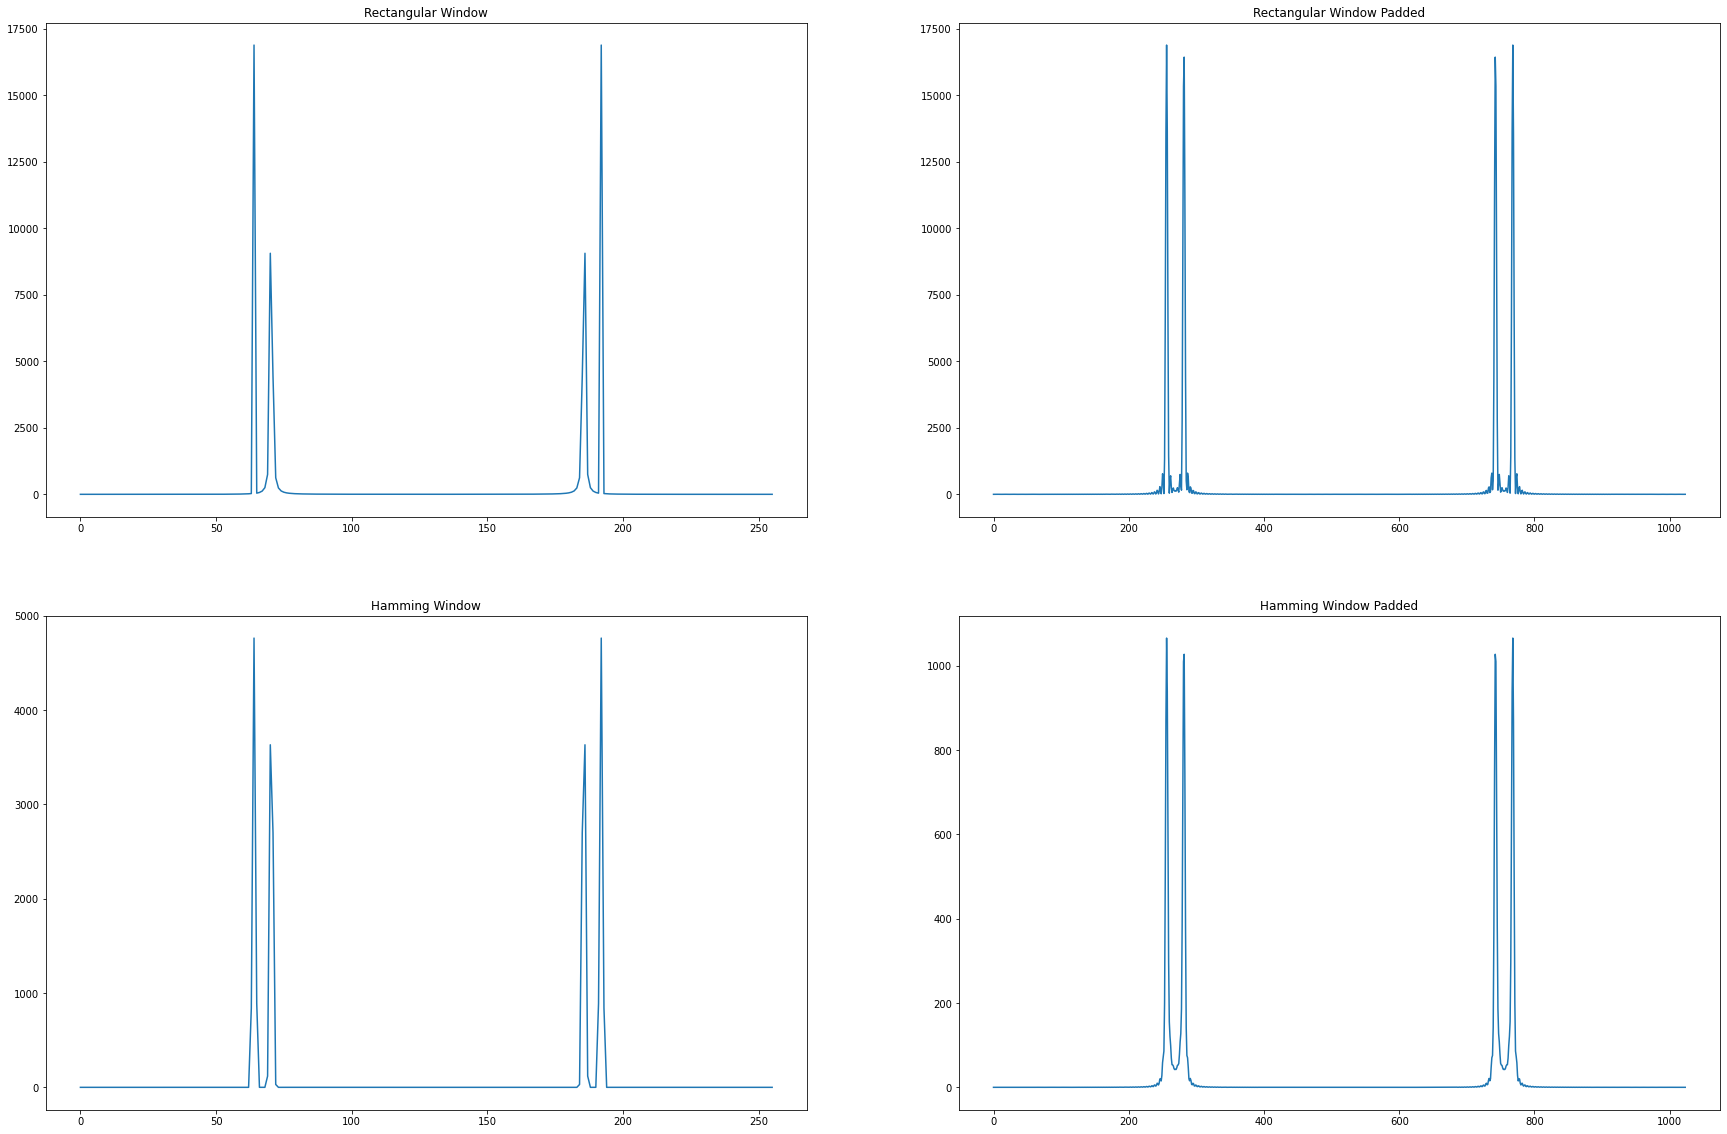

In [43]:
print(len(tune))
N = 256

x_n = tune[:256]
x_n_padded = np.append(x_n, np.zeros(N*3))

rect = signal.boxcar(N)
rect_padded = signal.boxcar(N*4)
ham = signal.hamming(N)
ham_padded = signal.hamming(N*4)

X_rect = np.square(np.abs(np.fft.fft(x_n*rect)))
X_rect_padded = np.square(np.abs(np.fft.fft(x_n_padded*rect_padded)))

X_ham = np.square(np.abs(np.fft.fft(x_n*ham)))
X_ham_padded = np.square(np.abs(np.fft.fft(x_n_padded*ham_padded)))

plt.figure(figsize=(30,20))
plt.subplot(221)
plt.plot(X_rect)
plt.title("Rectangular Window")

plt.subplot(222)
plt.plot(X_rect_padded)
plt.title("Rectangular Window Padded")

plt.subplot(223)
plt.plot(X_ham)
plt.title("Hamming Window")

plt.subplot(224)
plt.plot(X_ham_padded)
plt.title("Hamming Window Padded")


#### What is the closest frequency to 2000 Hz that you can resolve using the Fourier transform method? Which of the following method applied to x(n) results in the best resolving capabilities? Why?

The closest frequency that can be resolved is 2020 Hz. To resolve this, I used the zero-padded by factor of four, Hamming window. The zero-padding was necessary in order to increase the frequency resolution, and I chose the Hamming window because 

Text(0.5, 1.0, '50% Overlap')

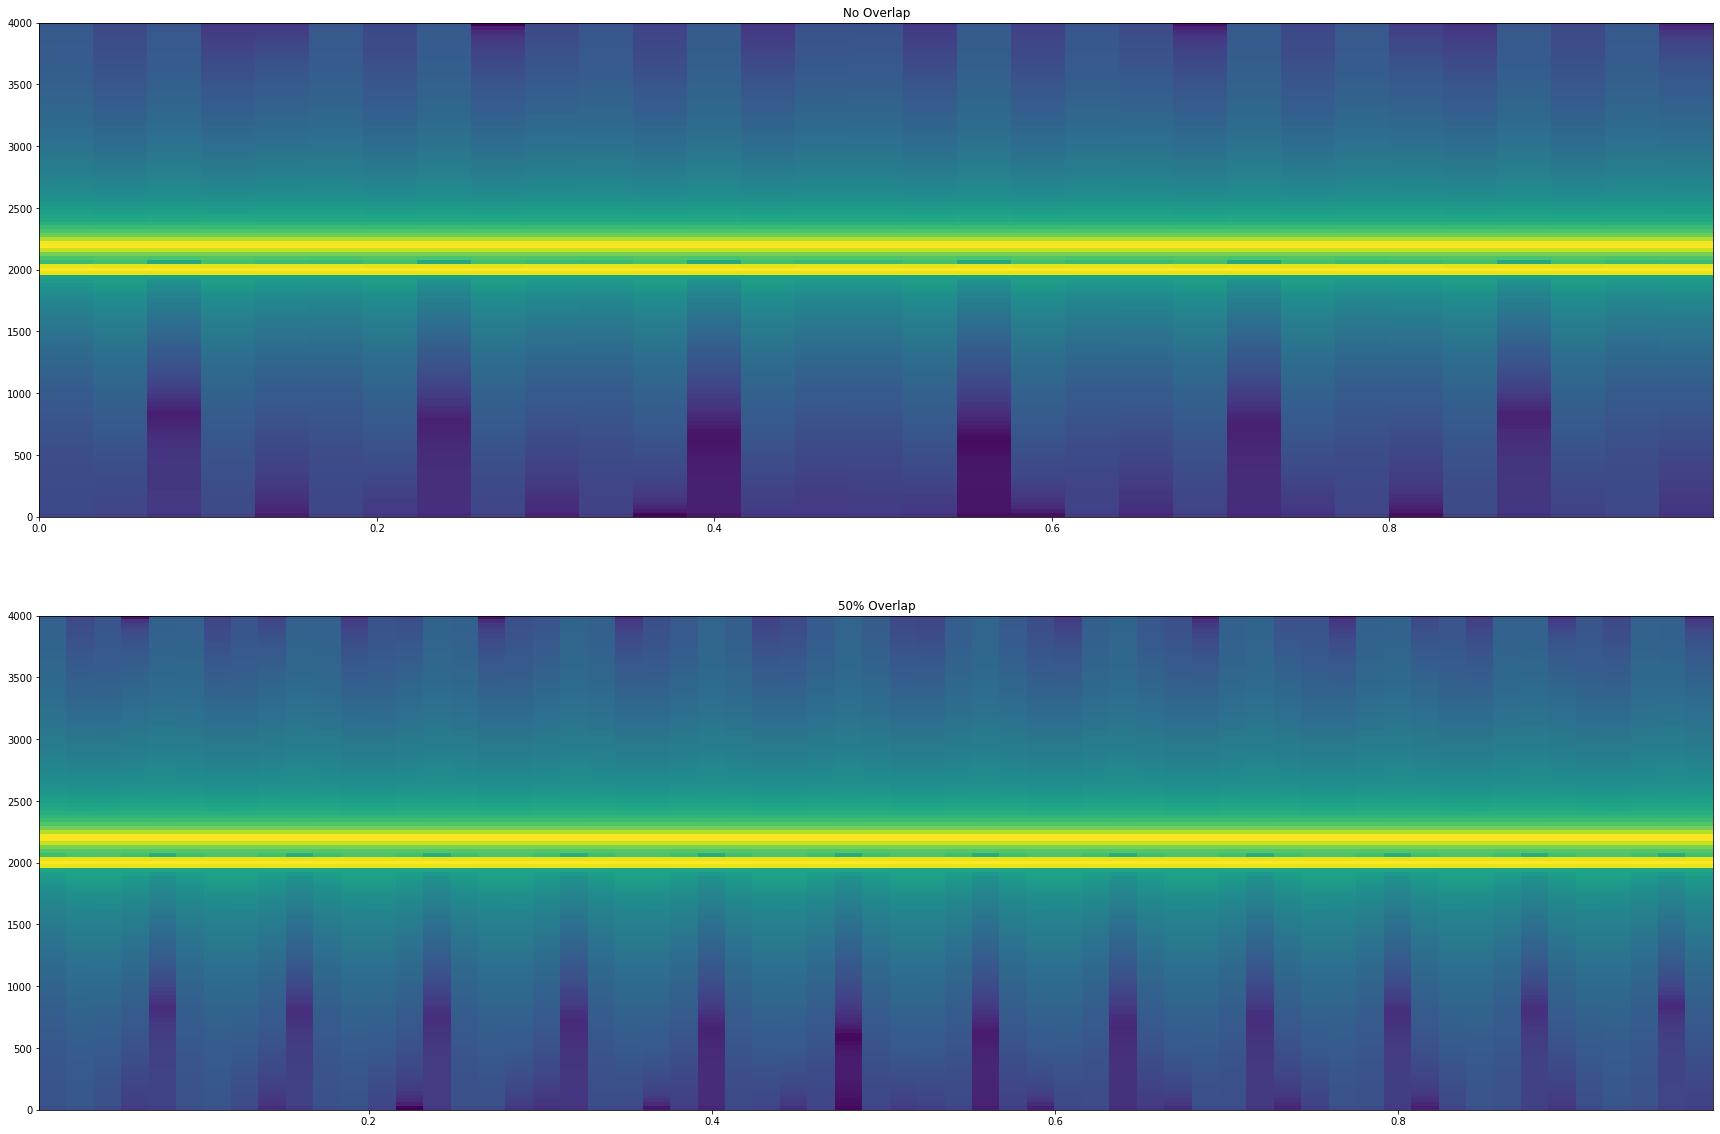

In [44]:
# spectograms for the signal from part 2

plt.figure(figsize=(30,20))
plt.subplot(211)
plt.specgram(tune, NFFT=256, Fs=fs, noverlap=0)
plt.title("No Overlap")

plt.subplot(212)
plt.specgram(tune, NFFT=256, Fs=fs)
plt.title("50% Overlap")

In [45]:
t = np.linspace(0,0.5,4001)
s = signal.chirp(t,1000,0.5,5000);    # Frequency-sweep that goes from 1000 Hz to 5000 Hz in 0.5 seconds

Audio(s,rate=8192)    # Default rate is 8192Hz

Text(0.5, 1.0, '50% Overlap')

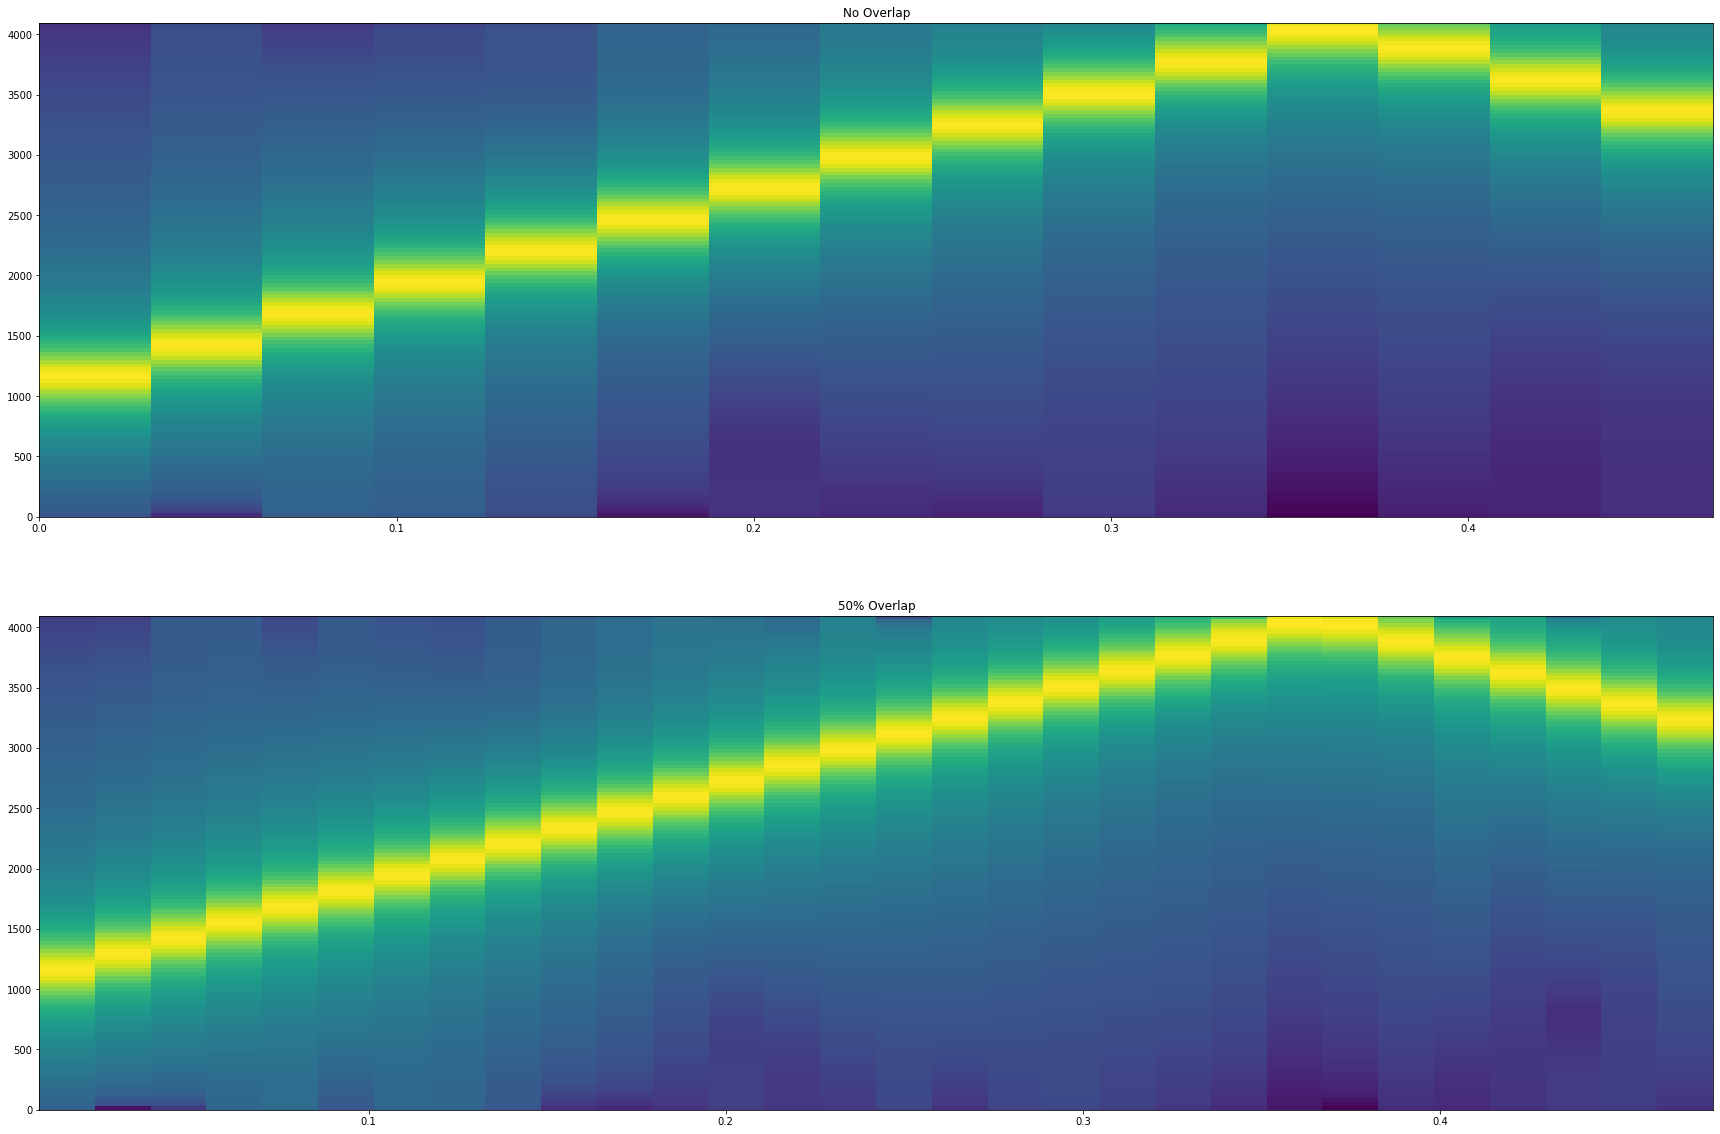

In [46]:
# spectograms of the chirp signal

chirp_fs = 8192

plt.figure(figsize=(30,20))
plt.subplot(211)
plt.specgram(s, NFFT=256, Fs=chirp_fs, noverlap=0)
plt.title("No Overlap")

plt.subplot(212)
plt.specgram(s, NFFT=256, Fs=chirp_fs)
plt.title("50% Overlap")

#### How are the spectrograms different between no overlap and 50% overlap? What is going on at 0.4 seconds into the frequency-sweep signal?

The spectogram with 50% overlap seems to have more time precision. Since the Hanning window is applied by default and it is a tapering function, each window decreases towards zero near the boundaries, leading to the loss of some data. By including overlap, some of this data is able to be retrived. This is clear by the graphs above since the loss of data must explain why the spectogram with no overlap has worse time precision than its counterpart. At 0.4 seconds of the frequency-sweep signal, the frequency is decreasing shortly after reaching a peak near 4000 Hz. 